In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
#CARGAMOS NUESTRO DATASET
data = pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
#Asignamos nuevos nombres a las columnas
columns = ['Edad',	'Sexo', 'TipoDolor',	'PSDescanso',	'Colesterol',	'GlicemiaAyunas',	'EcgDescanso', 'MaxFC', 'AngEx', 'DepST',	'PenST',	'NumVM',	'Daño',	'Salida']
data.columns = columns
data.head(10)
#Glicemia ayunas > 120mg/dl (1=si, 0=no)

,Edad,Sexo,TipoDolor,PSDescanso,Colesterol,GlicemiaAyunas,EcgDescanso,MaxFC,AngEx,DepST,PenST,NumVM,Daño,Salida
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
#Revisamos tipos de datos
data.dtypes

Edad                int64
Sexo                int64
TipoDolor           int64
PSDescanso          int64
Colesterol          int64
GlicemiaAyunas      int64
EcgDescanso         int64
MaxFC               int64
AngEx               int64
DepST             float64
PenST               int64
NumVM               int64
Daño                int64
Salida              int64
dtype: object

In [ ]:
#Revisamos datos nulos
data.isnull().sum()

Edad              0
Sexo              0
TipoDolor         0
PSDescanso        0
Colesterol        0
GlicemiaAyunas    0
EcgDescanso       0
MaxFC             0
AngEx             0
DepST             0
PenST             0
NumVM             0
Daño              0
Salida            0
dtype: int64

<AxesSubplot:xlabel='Edad', ylabel='PSDescanso'>

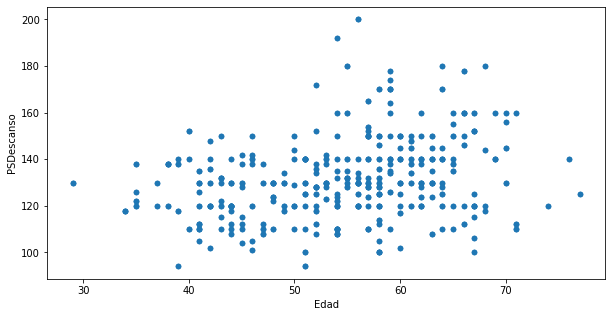

In [ ]:
#Graficamos diferentes variables para ver si varian mucho de acuerdo a la edad.
data.plot.scatter(x='Edad', y='PSDescanso', figsize=(10,5))

<AxesSubplot:xlabel='Edad', ylabel='Colesterol'>

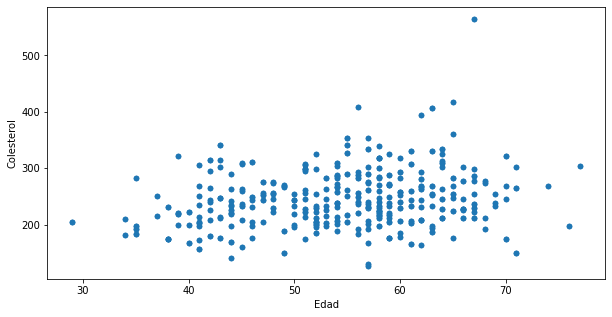

In [ ]:
data.plot.scatter(x='Edad', y='Colesterol', figsize=(10,5))

<AxesSubplot:xlabel='Edad', ylabel='MaxFC'>

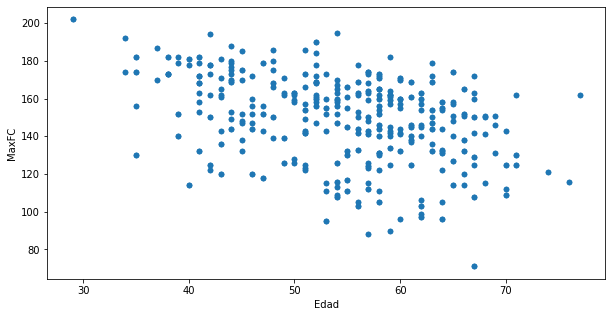

In [ ]:
data.plot.scatter(x='Edad', y='MaxFC', figsize=(10,5))

In [ ]:
#Definimos variables dependientes e independientes
y = data['Salida']
X = data.drop('Salida', axis=1)

In [ ]:
#Separar datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [ ]:
#Definir el algoritmo
algoritmo = svm.SVC(kernel ='linear')

In [ ]:
#Entrenar el algoritmo
algoritmo.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#Realizar prediccion
y_test_pred = algoritmo.predict(X_test)

In [ ]:
#Ver resultados, en la diagonal principal los valores correctos en la otra los incorrectos
print(confusion_matrix(y_test, y_test_pred))

[[79 30]
 [ 7 89]]


In [ ]:
#Exactitud y prediccion del modelo
print(accuracy_score(y_test, y_test_pred))
print(precision_score(y_test, y_test_pred))

0.8195121951219512
0.7478991596638656
